In [1]:
import wfdb
import numpy as np
from collections import Counter

# Load record 100 and annotations
record = wfdb.rdrecord("../data/100")
fs = int(record.fs)
sig = record.p_signal[:, 0]  # Lead I

ann = wfdb.rdann("../data/100", "atr")

# Get beat locations and symbols
beat_samples = np.array(ann.sample, dtype=int)
beat_symbols = ann.symbol


In [6]:
# STEP: Load record 200 and annotations
import wfdb
import numpy as np
from collections import Counter
import os

record = wfdb.rdrecord("../data/200")          # ✅ changed from "100" to "200"
fs = int(record.fs)
sig = record.p_signal[:, 0]

ann = wfdb.rdann("../data/200", "atr")         # ✅ changed from "100" to "200"

beat_samples = np.array(ann.sample, dtype=int)
beat_symbols = ann.symbol

# STEP: Map beat symbols to simplified class labels
beat_to_class = {
    'N': 'NSR', 'L': 'NSR', 'R': 'NSR', 'e': 'NSR', 'j': 'NSR',
    'A': 'PAC', 'a': 'PAC', 'J': 'PAC', 'S': 'PAC',
    'V': 'PVC', 'E': 'PVC',
}

def map_symbol(sym):
    return beat_to_class.get(sym, 'OTHER')

beat_classes = [map_symbol(s) for s in beat_symbols]

# STEP: Segment the ECG into 10-second chunks
window_sec = 10
step_sec = 5
win = window_sec * fs
step = step_sec * fs

X = []
y = []

def segment_label(start, end):
    idx = np.where((beat_samples >= start) & (beat_samples < end))[0]
    if len(idx) == 0:
        return None
    labels = [beat_classes[i] for i in idx]
    c = Counter(labels)
    label, count = c.most_common(1)[0]
    if count / len(labels) < 0.6 or label == 'OTHER':
        return None
    return label

for start in range(0, len(sig) - win, step):
    end = start + win
    label = segment_label(start, end)
    if label is None:
        continue
    segment = sig[start:end].astype(np.float32)
    m = segment.mean()
    s = segment.std() if segment.std() > 1e-6 else 1.0
    segment = (segment - m) / s
    X.append(segment)
    y.append(label)

X = np.stack(X)
y = np.array(y)

print("✅ Segmentation finished for record 200")
print("Segments:", X.shape)
print("Labels:", y.shape)
print("Label counts:", Counter(y))

# STEP: Save segmented dataset
os.makedirs("../data/segments", exist_ok=True)
np.savez("../data/segments/record200_10s_overlap50.npz", X=X, y=y)
print("✅ Saved: record200_10s_overlap50.npz")


✅ Segmentation finished for record 200
Segments: (178, 3600)
Labels: (178,)
Label counts: Counter({np.str_('NSR'): 177, np.str_('PVC'): 1})
✅ Saved: record200_10s_overlap50.npz


In [7]:
# STEP: Load record 203 and annotations
import wfdb
import numpy as np
from collections import Counter
import os

record = wfdb.rdrecord("../data/203")
fs = int(record.fs)
sig = record.p_signal[:, 0]

ann = wfdb.rdann("../data/203", "atr")

beat_samples = np.array(ann.sample, dtype=int)
beat_symbols = ann.symbol

# Map beat symbols to class labels
beat_to_class = {
    'N': 'NSR', 'L': 'NSR', 'R': 'NSR', 'e': 'NSR', 'j': 'NSR',
    'A': 'PAC', 'a': 'PAC', 'J': 'PAC', 'S': 'PAC',
    'V': 'PVC', 'E': 'PVC',
}

def map_symbol(sym):
    return beat_to_class.get(sym, 'OTHER')

beat_classes = [map_symbol(s) for s in beat_symbols]

# Segment the ECG
window_sec = 10
step_sec = 5
win = window_sec * fs
step = step_sec * fs

X = []
y = []

def segment_label(start, end):
    idx = np.where((beat_samples >= start) & (beat_samples < end))[0]
    if len(idx) == 0:
        return None
    labels = [beat_classes[i] for i in idx]
    c = Counter(labels)
    label, count = c.most_common(1)[0]
    if count / len(labels) < 0.6 or label == 'OTHER':
        return None
    return label

for start in range(0, len(sig) - win, step):
    end = start + win
    label = segment_label(start, end)
    if label is None:
        continue
    segment = sig[start:end].astype(np.float32)
    m = segment.mean()
    s = segment.std() if segment.std() > 1e-6 else 1.0
    segment = (segment - m) / s
    X.append(segment)
    y.append(label)

X = np.stack(X)
y = np.array(y)

print("✅ Segmentation finished for record 203")
print("Segments:", X.shape)
print("Labels:", y.shape)
print("Label counts:", Counter(y))

# Save to file
os.makedirs("../data/segments", exist_ok=True)
np.savez("../data/segments/record203_10s_overlap50.npz", X=X, y=y)
print("✅ Saved: record203_10s_overlap50.npz")


✅ Segmentation finished for record 203
Segments: (336, 3600)
Labels: (336,)
Label counts: Counter({np.str_('NSR'): 335, np.str_('PVC'): 1})
✅ Saved: record203_10s_overlap50.npz


In [8]:
# STEP: Load record 208 and annotations
import wfdb
import numpy as np
from collections import Counter
import os

record = wfdb.rdrecord("../data/208")
fs = int(record.fs)
sig = record.p_signal[:, 0]

ann = wfdb.rdann("../data/208", "atr")

beat_samples = np.array(ann.sample, dtype=int)
beat_symbols = ann.symbol

# Map beat symbols to class labels
beat_to_class = {
    'N': 'NSR', 'L': 'NSR', 'R': 'NSR', 'e': 'NSR', 'j': 'NSR',
    'A': 'PAC', 'a': 'PAC', 'J': 'PAC', 'S': 'PAC',
    'V': 'PVC', 'E': 'PVC',
}

def map_symbol(sym):
    return beat_to_class.get(sym, 'OTHER')

beat_classes = [map_symbol(s) for s in beat_symbols]

# Segment the ECG
window_sec = 10
step_sec = 5
win = window_sec * fs
step = step_sec * fs

X = []
y = []

def segment_label(start, end):
    idx = np.where((beat_samples >= start) & (beat_samples < end))[0]
    if len(idx) == 0:
        return None
    labels = [beat_classes[i] for i in idx]
    c = Counter(labels)
    label, count = c.most_common(1)[0]
    if count / len(labels) < 0.6 or label == 'OTHER':
        return None
    return label

for start in range(0, len(sig) - win, step):
    end = start + win
    label = segment_label(start, end)
    if label is None:
        continue
    segment = sig[start:end].astype(np.float32)
    m = segment.mean()
    s = segment.std() if segment.std() > 1e-6 else 1.0
    segment = (segment - m) / s
    X.append(segment)
    y.append(label)

X = np.stack(X)
y = np.array(y)

print("✅ Segmentation finished for record 208")
print("Segments:", X.shape)
print("Labels:", y.shape)
print("Label counts:", Counter(y))

# Save to file
os.makedirs("../data/segments", exist_ok=True)
np.savez("../data/segments/record208_10s_overlap50.npz", X=X, y=y)
print("✅ Saved: record208_10s_overlap50.npz")


✅ Segmentation finished for record 208
Segments: (114, 3600)
Labels: (114,)
Label counts: Counter({np.str_('NSR'): 104, np.str_('PVC'): 10})
✅ Saved: record208_10s_overlap50.npz


In [2]:
# Group similar beats into 3 major classes
beat_to_class = {
    'N': 'NSR',   # Normal
    'L': 'NSR', 'R': 'NSR', 'e': 'NSR', 'j': 'NSR',
    'A': 'PAC',   # Premature atrial contraction
    'a': 'PAC', 'J': 'PAC', 'S': 'PAC',
    'V': 'PVC',   # Premature ventricular contraction
    'E': 'PVC',
}

def map_symbol(sym):
    return beat_to_class.get(sym, 'OTHER')

beat_classes = [map_symbol(s) for s in beat_symbols]



In [3]:
window_sec = 10
step_sec = 5
win = window_sec * fs
step = step_sec * fs

X = []
y = []

def segment_label(start, end):
    idx = np.where((beat_samples >= start) & (beat_samples < end))[0]
    if len(idx) == 0:
        return None
    labels = [beat_classes[i] for i in idx]
    c = Counter(labels)
    label, count = c.most_common(1)[0]
    if count / len(labels) < 0.6:
        return None
    if label == "OTHER":
        return None
    return label

for start in range(0, len(sig) - win, step):
    end = start + win
    label = segment_label(start, end)
    if label is None:
        continue
    segment = sig[start:end].astype(np.float32)
    # Normalize
    m = segment.mean()
    s = segment.std() if segment.std() > 1e-6 else 1.0
    segment = (segment - m) / s
    X.append(segment)
    y.append(label)

X = np.stack(X)
y = np.array(y)
print("Segments:", X.shape, "Labels:", y.shape)
print("Label counts:", Counter(y))


Segments: (360, 3600) Labels: (360,)
Label counts: Counter({np.str_('NSR'): 360})


In [4]:
import os
os.makedirs("../data/segments", exist_ok=True)
np.savez("../data/segments/record100_10s_overlap50.npz", X=X, y=y)
print("✅ Dataset saved at: ../data/segments/record100_10s_overlap50.npz")


✅ Dataset saved at: ../data/segments/record100_10s_overlap50.npz


In [5]:
import wfdb

# Add arrhythmic records
records = ['200', '203', '208']

for rec in records:
    print(f"Downloading record {rec}...")
    wfdb.dl_database("mitdb", dl_dir="../data", records=[rec])


Generating record list for: 200
Generating list of all files for: 200
Finished downloading files
Generating record list for: 203
Generating list of all files for: 203
Finished downloading files
Generating record list for: 208
Generating list of all files for: 208
Finished downloading files


In [9]:
import numpy as np
from collections import Counter
import os

# Step 1: Load individual .npz segment files
record_ids = ["100", "200", "203", "208"]
X_all = []
y_all = []

for rid in record_ids:
    path = f"../data/segments/record{rid}_10s_overlap50.npz"
    if os.path.exists(path):
        data = np.load(path)
        X_all.append(data["X"])
        y_all.append(data["y"])
        print(f"✅ Loaded record {rid}: {data['X'].shape[0]} segments")
    else:
        print(f"❌ Missing file for record {rid}")

# Step 2: Combine into one dataset
X_all = np.concatenate(X_all, axis=0)
y_all = np.concatenate(y_all, axis=0)

print("\n✅ All records combined")
print("Total Segments:", X_all.shape)
print("Total Labels:", y_all.shape)
print("Class distribution:", Counter(y_all))

# Step 3: Save the full dataset
save_path = "../data/segments/all_records_dataset.npz"
np.savez(save_path, X=X_all, y=y_all)
print(f"\n✅ Combined dataset saved at: {save_path}")


✅ Loaded record 100: 360 segments
✅ Loaded record 200: 178 segments
✅ Loaded record 203: 336 segments
✅ Loaded record 208: 114 segments

✅ All records combined
Total Segments: (988, 3600)
Total Labels: (988,)
Class distribution: Counter({np.str_('NSR'): 976, np.str_('PVC'): 12})

✅ Combined dataset saved at: ../data/segments/all_records_dataset.npz


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

# Load the full dataset
data = np.load("../data/segments/all_records_dataset.npz")
X = data["X"]         # Shape: (988, 3600)
y = data["y"]         # Labels: 'NSR', 'PVC'

# Convert class labels to integers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # 'NSR' -> 0, 'PVC' -> 1

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

print("✅ Dataset loaded and split:")
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)
print("Class names:", list(encoder.classes_))  # ['NSR', 'PVC']


✅ Dataset loaded and split:
Train set: (790, 3600) (790,)
Test set: (198, 3600) (198,)
Class names: [np.str_('NSR'), np.str_('PVC')]


In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Reshape input for CNN: (samples, time_steps, channels)
X_train_cnn = X_train[..., np.newaxis]
X_test_cnn = X_test[..., np.newaxis]

# Build the model
model = models.Sequential([
    layers.Conv1D(16, kernel_size=5, activation='relu', input_shape=(3600, 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(32, kernel_size=5, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=5, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification: NSR or PVC
])

# Compile it
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\husee\ECG-Arrhythmia-Assistant\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 3596, 16)       │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1798, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1794, 32)       │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 897, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 893, 64)        │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,105 (59.00 KB)

 Trainable params: 15,105 (59.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from sklearn.utils import class_weight
import numpy as np

# y_train already contains 0 (NSR) and 1 (PVC)
y_train_int = y_train  # Already numerical

# Compute class weights
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_int),
    y=y_train_int
)

class_weights = {i: w for i, w in enumerate(weights)}
print("✅ Class Weights:", class_weights)


✅ Class Weights: {0: np.float64(0.5064102564102564), 1: np.float64(39.5)}


In [18]:
# Train the model with class weights
history = model.fit(
    X_train_cnn, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_cnn, y_test),
    class_weight=class_weights  # ✅ This is the key change
)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5911 - loss: 0.7268 - val_accuracy: 0.9899 - val_loss: 0.1974
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7810 - loss: 0.6783 - val_accuracy: 0.6212 - val_loss: 0.5300
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9418 - loss: 0.6114 - val_accuracy: 0.7828 - val_loss: 0.4760
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6253 - loss: 0.5433 - val_accuracy: 0.8737 - val_loss: 0.3325
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8342 - loss: 0.4705 - val_accuracy: 0.6818 - val_loss: 0.5215
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7291 - loss: 0.4186 - val_accuracy: 0.9596 - val_loss: 0.1958
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8101 - loss: 0.3891 - val_accuracy: 0.6515 - val_loss: 0.5942
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8595 - loss: 0.3655 - val_accuracy: 0.8030 - v

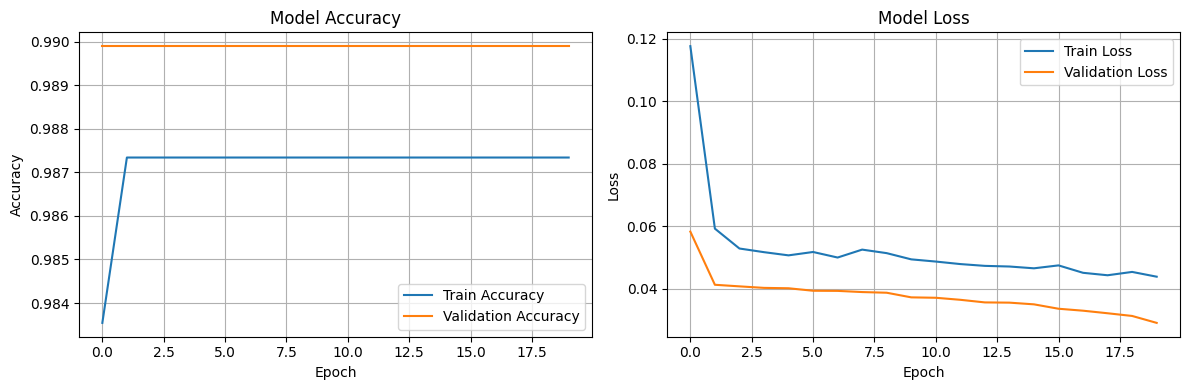

In [13]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Classification Report:
              precision    recall  f1-score   support

         NSR       1.00      0.90      0.95       196
         PVC       0.10      1.00      0.17         2

    accuracy                           0.90       198
   macro avg       0.55      0.95      0.56       198
weighted avg       0.99      0.90      0.94       198



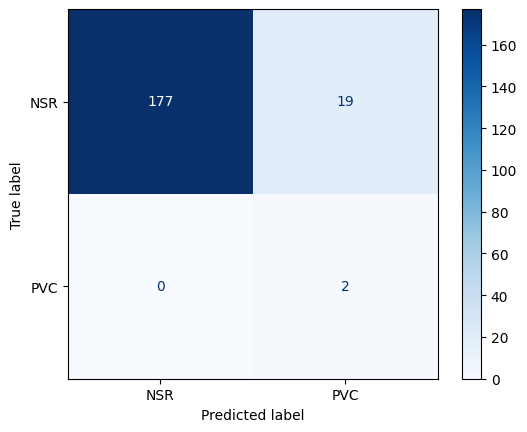

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Define class names
class_names = [str('NSR'), str('PVC')]

# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues")
